1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

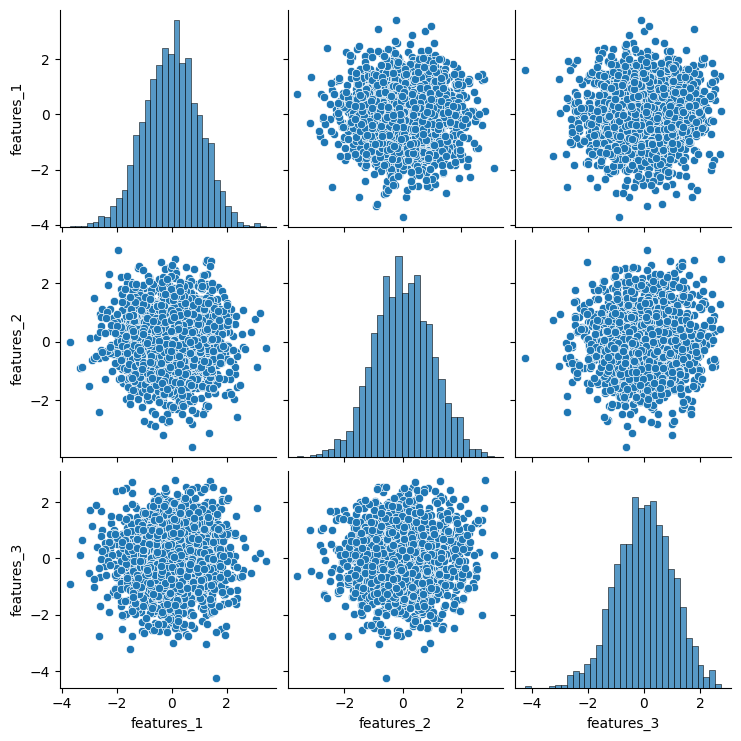

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to load the remote file
#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv -P data/
df = pd.read_csv('data/regression_generated.csv')
#from the dataframe, we select only the features 1, 2 and 3
df = df[['features_1','features_2', 'features_3']]
sns.pairplot(df)

#These features are not correlated. We can see that because we don't have a positive or negative correlation
#when looking at the scatter plot

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

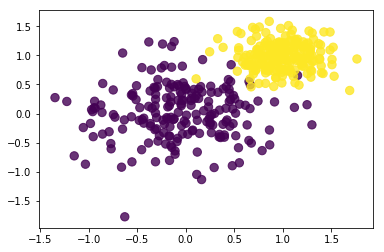

In [13]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')


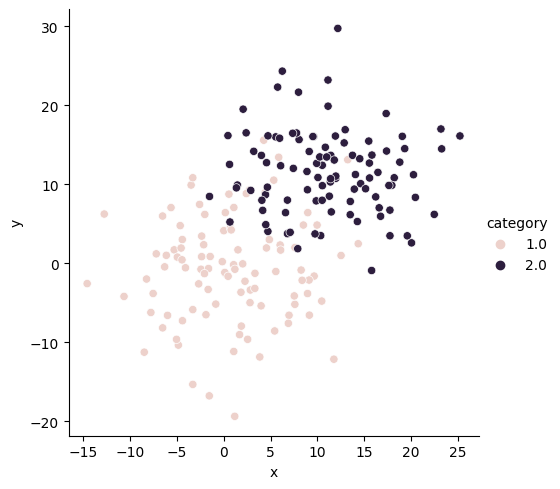

In [14]:
import numpy as np
np.random.seed(123) # fixing the seed allows to reproduce the pseudo random number sequence

def generate_2D(mean1, cov1, mean2, cov2,num):
    #2D gaussian with a given mean and standard deviation
    category1 = np.random.normal(mean1, cov1, (num,2))
    category2 = np.random.normal(mean2, cov2, (num,2))
    
    #creating the 2D datase
    #puting the 2D gaussian in a dataset
    df1 = pd.DataFrame(category1)
    df2 = pd.DataFrame(category2)
    
    #adding a column 'category' with 1 or 2
    df1 = pd.concat([df1, pd.Series(np.linspace(1., 1., num))], axis=1, ignore_index=True)
    df2 = pd.concat([df2, pd.Series(np.linspace(2., 2., num))], axis=1, ignore_index=True)
    df3 = pd.concat([df1,df2], ignore_index=True)
    
    #Naming the column
    col = ['x', 'y', 'category']
    df3.columns = col
    return df3

data = generate_2D(0,6,12,6,100)
#two categories with different marker colors.
sns.relplot(x="x", y="y", hue="category", data=data)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

(array([1., 0., 3., 8., 6., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.24681325, -0.21274072, -0.17866819, -0.14459566, -0.11052313,
        -0.0764506 , -0.04237807, -0.00830554,  0.02576699,  0.05983952,
         0.09391205,  0.12798458,  0.16205711,  0.19612964,  0.23020217,
         0.2642747 ,  0.29834723,  0.33241976,  0.36649229,  0.40056482,
         0.43463735,  0.46870988,  0.50278241,  0.53685494,  0.57092747,
         0.605     ]),
 <BarContainer object of 25 artists>)

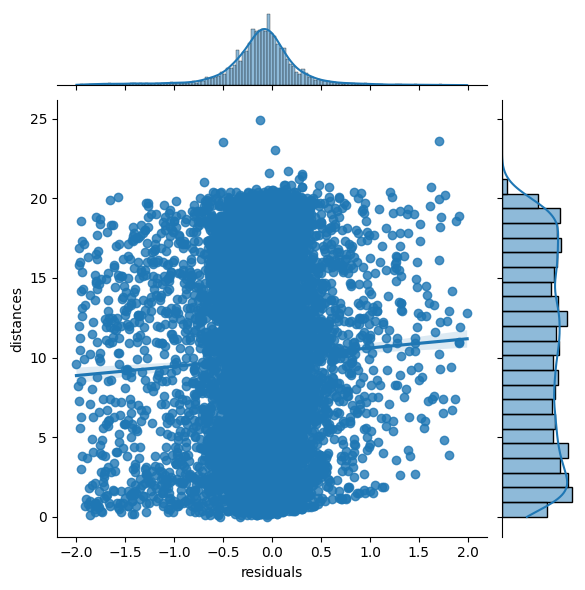

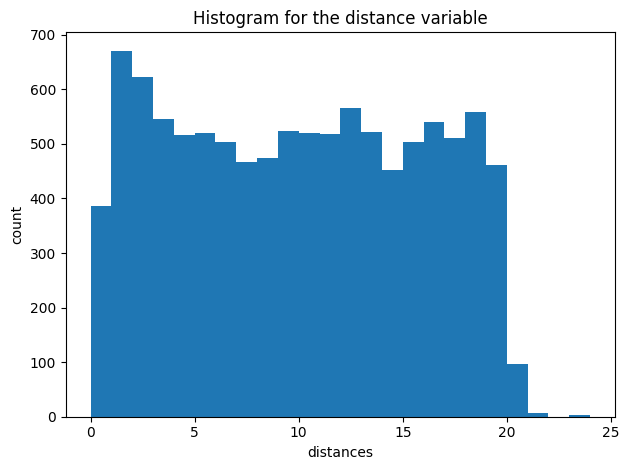

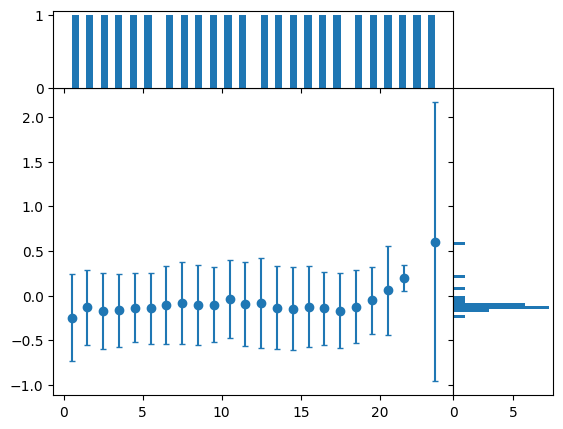

In [15]:
#to load the remote file
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
import pickle
from scipy import stats

filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

#there is 2 variables : residuals and distances

#Convert the content to a Pandas Dataframe
df = pd.DataFrame(new_dict[()])

#absolute variable "residual" smaller than 2
df1 = df.loc[np.abs(df['residuals']) < 2]
sns.jointplot(x="residuals", y="distances", data=df1, kind="reg")

#as we can see thanks to seaborn it that there is no correlation between the two variables
#when the distance increase, the residuals does not particurally increase. 
#there is a really weak positive linear coorelation => the line does not really increase
#so we can say there is not correlation

fig = plt.figure() # create the figure and the axes
#bin = the min and the max value distance
n, bins, patches = plt.hist(df1['distances'], bins=np.arange(df1['distances'].min(), df1['distances'].max()))

ax = fig.axes[0]
ax.set_title('Histogram for the distance variable')
ax.set_xlabel('distances')
ax.set_ylabel('count')
fig.tight_layout()

#array of bin centers
x = (bins[:-1] + bins[1:]) / 2

#mean values of the "residuals", estimated in slices (bins) of "distance"
y = []
err_y = []
for i in bins[:-1]:
    #we slice the dataframe in bins
    data = df1.loc[(df1['distances'] > i) & (df1['distances'] < i+1)]
    #for every dataframe that we obtain, we do the mean of the column residuals
    y.append(data['residuals'].mean())
    err_y.append(data['residuals'].std())

y = np.array(y)
err_y = np.array(err_y)

#Dataframe with x, y and err_y
data = pd.DataFrame({'x':x,'y':y,'err_y':err_y})
 
# Create a Figure
fig = plt.figure()
ax = fig.add_gridspec(top=0.75, right=0.75).subplots()

#create the two histograms
ax_histx = ax.inset_axes([0, 1., 1, 0.25], sharex=ax)
ax_histy = ax.inset_axes([1., 0, 0.25, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.errorbar(x,
            y, 
            yerr=err_y, 
            fmt='o',
            capsize=2)
#one of the hist needs to be horizontal
ax_histx.hist(x, bins=50)
ax_histy.hist(y, bins=25, orientation='horizontal')




4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [16]:
#KDE = kernel density estimate

/tmp/ipykernel_6689/155495537.py:14: RuntimeWarning: divide by zero encountered in divide
  y_error = 1 / np.sqrt(h)


1129.4604090856826
100.00000000000003


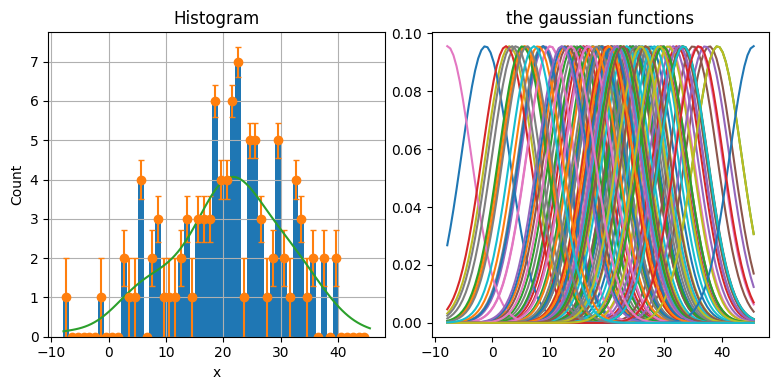

In [18]:
from scipy.stats import norm
import scipy.integrate
from matplotlib.ticker import MaxNLocator

#mean = 20, standard deviation = 10, size = 100
x = np.random.normal(20, 10,100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
h, bins, _ = ax1.hist(x, bins=np.arange(x.min(), x.max()))

#we calculate the center of each bins for the data points error
bin_centres = (bins[:-1] + bins[1:]) / 2
#error is a poisson uncertainty
y_error = 1 / np.sqrt(h)

#we print the errorbar
ax1.errorbar(
    x=bin_centres, 
    y=h,     
    yerr=y_error, 
    fmt='o', 
    capsize=2)


# get the axes from the figure and pick the first (and only) element (beacuse there is only one axes)
ax1.set_title('Histogram')
ax1.set_xlabel('x')
ax1.set_ylabel('Count')
#setting a grid to be more readable
ax1.grid(True)
#set proper value of y axis => display only integer labels
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.tight_layout()

# standard deviation
std = 1.06 * x.std()* np.power(x.size,-1/5)
gauss = []
#the absisse of x
abs_x = np.linspace(x.min(), x.max(), len(x))
ax2.set_title('the gaussian functions')
for i in x:
    gauss.append(norm.pdf(abs_x,i,std))
    ax2.plot(abs_x, norm.pdf(abs_x,i,std))
    
gauss = np.array(gauss)
gauss_sum = np.sum(gauss, axis = 0)

#normalization
integral = scipy.integrate.trapz(gauss_sum, abs_x)
gauss_sum = gauss_sum * (len(x) / integral)
ax1.plot(abs_x, gauss_sum)
